# Explainable AI (XAI) Methods Part 1 — Partial Dependence Plot (PDP)
Reference:
* https://towardsdatascience.com/explainable-ai-xai-methods-part-1-partial-dependence-plot-pdp-349441901a3d
* https://www.kaggle.com/dansbecker/partial-plots

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('data/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes") # Convert from string “Yes”/”No” to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]] # Only work for numeric columns
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

In [3]:
feature_names

['Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Goals in PSO']

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


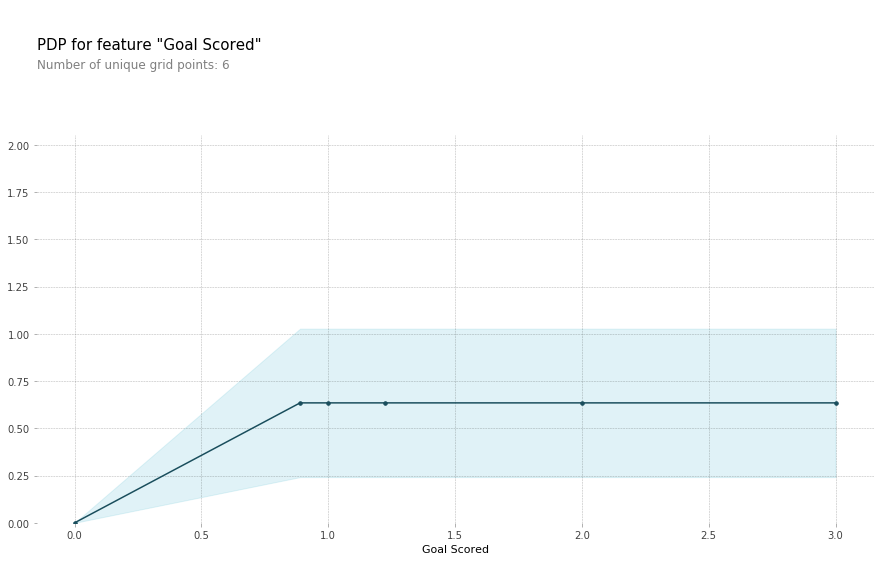

In [4]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='Goal Scored')
# plot
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show( )

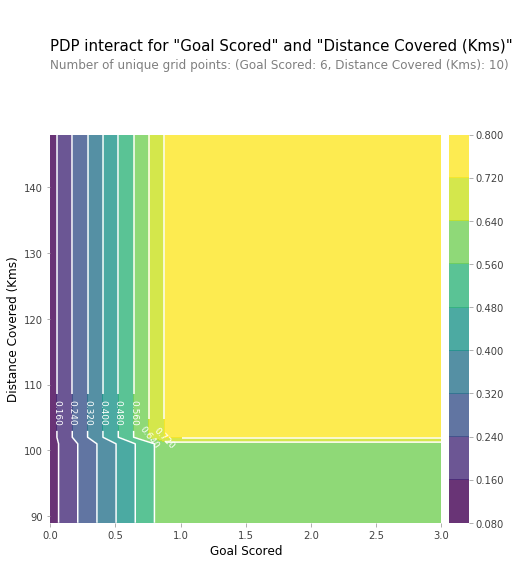

In [5]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1 = pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show( )